## Лабораторная работа 3 ##

In [1]:
import pandas as pd

# Загрузка данных
data = pd.read_csv("Most popular 1000 Youtube videos.csv")
print(data.head())

   rank                                              Video    Video views  \
0     1  Lil Nas X - Old Town Road (Official Movie) ft....     54,071,677   
1     2  20 Tennis shots if they were not filmed, NOBOD...      3,471,237   
2     3                 JoJo Siwa - Karma (Official Video)     34,206,747   
3     4    David Kushner - Daylight (Official Music Video)     18,558,390   
4     5  Wiz Khalifa - See You Again ft. Charlie Puth [...  6,547,981,039   

        Likes Dislikes Category  published  
0   3,497,955   78,799    Music       2019  
1      19,023      859      NaN       2017  
2     293,563      NaN    Music       2024  
3     680,732      NaN    Music       2023  
4  44,428,537      NaN    Music       2015  


удалим пропуски

In [2]:
# Удаление строк с пропусками
data_cleaned = data.dropna()
print(data_cleaned.head())

    rank                                              Video Video views  \
0      1  Lil Nas X - Old Town Road (Official Movie) ft....  54,071,677   
5      6  JP Saxe - If the World Was Ending (Official Vi...  76,834,495   
7      8  Polo G, Stunna 4 Vegas & NLE Choppa feat. Mike...   7,396,199   
9     10                JD Pantoja - 12•19 (Official Video)   7,010,732   
10    11  Power Star Pawan Kalyan Special Surprise To Se...      96,686   

        Likes Dislikes       Category  published  
0   3,497,955   78,799          Music       2019  
5     804,353   21,195          Music       2019  
7     320,910    6,485          Music       2020  
9   1,027,392   34,185          Music       2020  
10      1,007       82  Entertainment       2018  


In [3]:
# Заменяем запятые на точки в столбце "Video views"
data_cleaned["Video views"] = data_cleaned["Video views"].str.replace(",", "", regex=False).astype(int)
data_cleaned["Likes"] = data_cleaned["Likes"].str.replace(",", "", regex=False).astype(int)
data_cleaned["Dislikes"] = data_cleaned["Dislikes"].str.replace(",", "", regex=False).astype(int)

# Выводим результат
print(data_cleaned)

     rank                                              Video  Video views  \
0       1  Lil Nas X - Old Town Road (Official Movie) ft....     54071677   
5       6  JP Saxe - If the World Was Ending (Official Vi...     76834495   
7       8  Polo G, Stunna 4 Vegas & NLE Choppa feat. Mike...      7396199   
9      10                JD Pantoja - 12•19 (Official Video)      7010732   
10     11  Power Star Pawan Kalyan Special Surprise To Se...        96686   
..    ...                                                ...          ...   
994   995                                      Rihanna "Cry"     32695896   
995   996  New Champ Kayn/Rhaast Leak for LOL (Moobeat cr...       847249   
996   997                       Ford Mustang Launch (street)      1001605   
997   998                      Eminem is gay - The Interview      2718939   
998   999  Yakuza OST - Baka Mitai (ばかみたい) Kiryu full ver...     52890986   

       Likes  Dislikes          Category  published  
0    3497955     7879

/var/folders/cw/4tjd167j4wz1b2l6dw4jq1zh0000gn/T/ipykernel_8699/4275324889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Video views"] = data_cleaned["Video views"].str.replace(",", "", regex=False).astype(int)
/var/folders/cw/4tjd167j4wz1b2l6dw4jq1zh0000gn/T/ipykernel_8699/4275324889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Likes"] = data_cleaned["Likes"].str.replace(",", "", regex=False).astype(int)
/var/folders/cw/4tjd167j4wz1b2l6dw4jq1zh0000gn/T/ipykernel_869

Разделение выборки на обчучающую и тестовую

In [4]:
from sklearn.model_selection import train_test_split

# Признаки (X) и целевая переменная (y)
X = data_cleaned[["Video views", "Likes", "Dislikes"]]  # Пример признаков
y = data_cleaned["Category"]  # Целевая переменная

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучение модeли КНН

Обучим модель KNN с произвольным значением гиперпараметра K (например, K = 5):

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Создание и обучение модели
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


# Создаем DataFrame для сравнения
comparison_df = pd.DataFrame({
    "Фактическое значение (y_test)": y_test,
    "Предсказанное значение (y_pred)": y_pred
})

# Выводим таблицу
print(comparison_df)

Точность модели: 0.34
                       precision    recall  f1-score   support

     Autos & Vehicles       0.00      0.00      0.00         1
               Comedy       0.11      0.08      0.09        13
        Entertainment       0.15      0.25      0.19         8
     Film & Animation       0.00      0.00      0.00         4
               Gaming       0.00      0.00      0.00         3
        Howto & Style       0.00      0.00      0.00         1
                Music       0.57      0.52      0.54        31
      News & Politics       0.00      0.00      0.00         4
Nonprofits & Activism       0.00      0.00      0.00         2
       People & Blogs       0.36      0.62      0.45        26
       Pets & Animals       0.00      0.00      0.00         6
               Sports       0.00      0.00      0.00         4

             accuracy                           0.34       103
            macro avg       0.10      0.12      0.11       103
         weighted avg       0.2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV

Используем GridSearchCV для поиска оптимального значения K:

In [6]:
from sklearn.model_selection import GridSearchCV

# Параметры для поиска
param_grid = {"n_neighbors": range(1, 21)}

# Поиск оптимального K
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Лучший параметр
print(f"Лучшее значение K: {grid_search.best_params_['n_neighbors']}")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Лучшее значение K: 20


Используем RandomizedSearchCV для более быстрого поиска:

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Параметры для поиска
param_dist = {"n_neighbors": randint(1, 21)}

# Поиск оптимального K
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Лучший параметр
print(f"Лучшее значение K: {random_search.best_params_['n_neighbors']}")

Лучшее значение K: 16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Сравнение метрик качества исходной и оптимальной моделей


Обучим модель с оптимальным значением K и сравним её с исходной моделью:

In [8]:
# Оптимальная модель
optimal_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
optimal_knn.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_optimal = optimal_knn.predict(X_test)

# Оценка качества оптимальной модели
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f"Точность оптимальной модели: {accuracy_optimal:.2f}")
print(classification_report(y_test, y_pred_optimal))

# Сравнение с исходной моделью
print(f"Точность исходной модели: {accuracy:.2f}")
print(f"Точность оптимальной модели: {accuracy_optimal:.2f}")

Точность оптимальной модели: 0.32
                       precision    recall  f1-score   support

     Autos & Vehicles       0.00      0.00      0.00         1
               Comedy       1.00      0.15      0.27        13
        Entertainment       0.10      0.12      0.11         8
     Film & Animation       0.00      0.00      0.00         4
               Gaming       0.00      0.00      0.00         3
        Howto & Style       0.00      0.00      0.00         1
                Music       0.46      0.35      0.40        31
      News & Politics       0.00      0.00      0.00         4
Nonprofits & Activism       0.00      0.00      0.00         2
       People & Blogs       0.28      0.73      0.41        26
       Pets & Animals       0.00      0.00      0.00         6
               Sports       0.00      0.00      0.00         4

             accuracy                           0.32       103
            macro avg       0.15      0.11      0.10       103
         weighted a

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [9]:
# Создаем DataFrame для сравнения
comparison_optimal_df = pd.DataFrame({
    "Фактическое значение (y_test)": y_test,
    "Предсказанное значение (y_pred)": y_pred_optimal
})

# Выводим таблицу
print(comparison_optimal_df)

    Фактическое значение (y_test) Предсказанное значение (y_pred)
305                People & Blogs                  People & Blogs
229              Film & Animation                  People & Blogs
857                         Music                           Music
539                Pets & Animals                  People & Blogs
191                        Gaming                  People & Blogs
..                            ...                             ...
972                         Music                  People & Blogs
952                        Comedy                  People & Blogs
575                Pets & Animals                  People & Blogs
898                People & Blogs                  People & Blogs
665                         Music                  People & Blogs

[103 rows x 2 columns]


Добавление кросс-валидации


Мы будем использовать cross_val_score для оценки модели с кросс-валидацией. Также добавим матрицу ошибок и ROC-AUC кривую.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Результаты кросс-валидации: [0.26213592 0.38235294 0.31372549 0.34313725 0.26470588]
Средняя точность кросс-валидации: 0.31


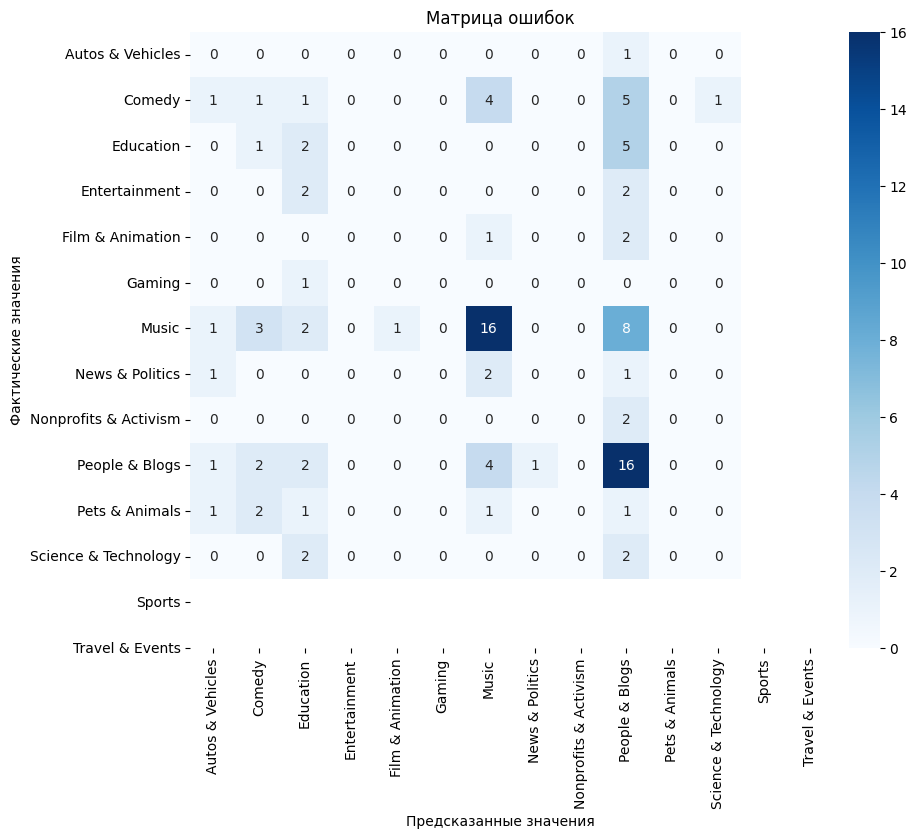

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


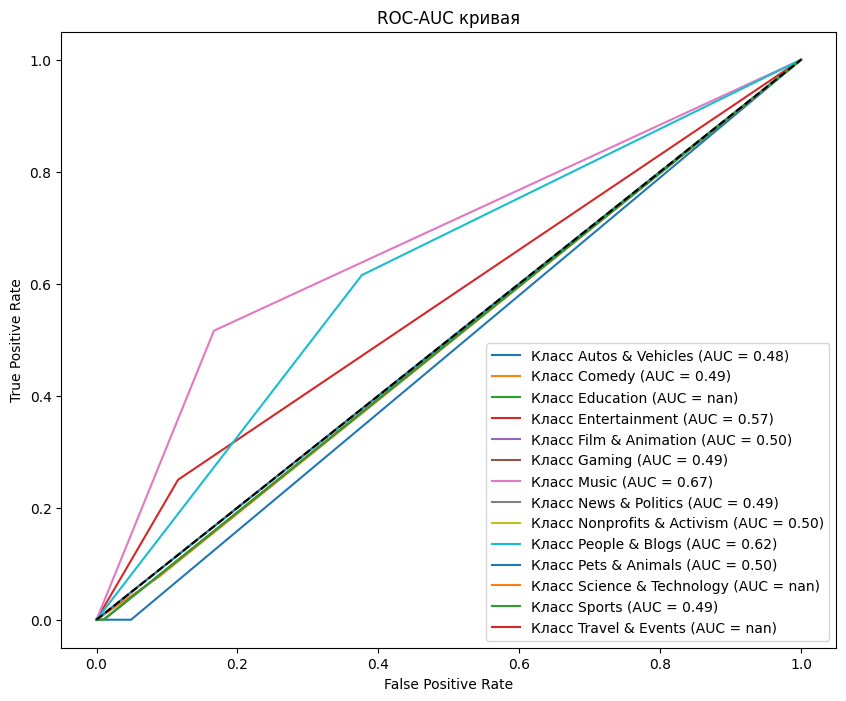

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Кросс-валидация для оценки модели
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(f"Результаты кросс-валидации: {cv_scores}")
print(f"Средняя точность кросс-валидации: {cv_scores.mean():.2f}")

# Матрица ошибок
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('Матрица ошибок')
plt.show()

# ROC-AUC кривая (для многоклассовой классификации)
y_test_bin = label_binarize(y_test, classes=knn.classes_)
y_pred_bin = label_binarize(y_pred, classes=knn.classes_)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(knn.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Визуализация ROC-AUC кривой
plt.figure(figsize=(10, 8))
for i in range(len(knn.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Класс {knn.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC кривая')
plt.legend(loc='lower right')
plt.show()